In [8]:
# API 키를 환경변수로 관리하기 위한 설정 파일
from dotenv import load_dotenv

# API 키 정보 로드
load_dotenv()


True

In [9]:
# LangSmith 추적을 설정합니다. https://smith.langchain.com
# !pip install -qU langchain-teddynote
from langchain_teddynote import logging

# 프로젝트 이름을 입력합니다.
logging.langsmith("practice")

LangSmith 추적을 시작합니다.
[프로젝트명]
practice


In [35]:
from langchain.vectorstores import FAISS
from langchain.embeddings import OpenAIEmbeddings

# Step 1: FAISS 인덱스 파일 로드
faiss_index_path = "naver_map_faiss"  # 저장된 Faiss 파일 경로
embeddings = OpenAIEmbeddings()  # 임베딩 객체 초기화

# 저장된 FAISS 인덱스를 불러와서 Retriever 생성
retriever_navermap = FAISS.load_local(faiss_index_path, embeddings,allow_dangerous_deserialization=True).as_retriever()

# 검색 매개변수 설정 (예: 검색 결과 상위 10개 반환)
retriever_navermap.search_kwargs = {"k": 20}

In [36]:
retriever_navermap.invoke("서울에서 1박 2일 동안의 여행 일정을 추천해 줄 수 있나요?")

[Document(id='c4178297-edb4-45ee-8f23-15ab3915358e', metadata={'store_name': '먼데이투선데이 청담', 'category': '양식', 'new_open': ' ', 'rating': '정보없음', 'visited_review': '방문자 리뷰 1,008', 'directions_text': '발렛 가능 (기본요금 2시간 5,000원 / 추가 10분당 1,000원)\n단, 슈퍼카 기본요금 10,000원\n\n343,4212번 버스 이용, 농협앞에서 하차.\n농협 골목에서 50m 직진, 컷루스 옆에 위치\n\n지하철 이용후 찾아오는길\n\n압구정로데오역(신분당선) 3번출구에서 도보 10분\n3번출구에서 250M 직진후 펜디매장에서 우회전\n200M 볼트스테이크 하우스 까지 걸어오시면\n미노트 매장이 보입니다.\n여기서 우회전 하시면 먼데이투선데이 를 만날 수 있습니다.\n\n네비게이션을 이용하여 찾아오실경우\n티맵, 카카오네비 먼데이투선데이 로 검색후 주소를 선택하시면 됩니다.\n\n(서울시 강남구 도산대로67길 13-3 EMPRESS빌딩 B1층)\n내용 더보기', 'store_id': '1766605714', 'address': '서울 강남구 도산대로67길 13-3 EMPRESS빌딩 B1층', 'blog_review': '블로그 리뷰 165', 'phone_num': '0507-1353-2217', 'business_hours': '화\n08:00 - 02:00\n01:30 라스트오더\n수(1/1)\n11:00 - 02:00\n목\n08:00 - 02:00\n01:30 라스트오더\n금\n08:00 - 02:00\n01:30 라스트오더\n토\n10:00 - 02:00\n01:30 라스트오더\n일\n10:00 - 01:00\n00:30 라스트오더\n월\n08:00 - 01:00\n00:30 라스트오더\n', 'info': 'https://app.catchtable.co.kr/ct/shop/diningbar

In [11]:
# Step 1: FAISS 인덱스 파일 로드
faiss_index_path = "faiss_opendata_index_combined"  # 저장된 Faiss 파일 경로
embeddings = OpenAIEmbeddings()  # 임베딩 객체 초기화

# 저장된 FAISS 인덱스를 불러와서 Retriever 생성
retriever_opendata = FAISS.load_local(faiss_index_path, embeddings,allow_dangerous_deserialization=True).as_retriever()

# 검색 매개변수 설정 (예: 검색 결과 상위 10개 반환)
retriever_opendata.search_kwargs = {"k": 20}

In [37]:
context = retriever_opendata.invoke(' 주소가 강남구의 카페 5개를 알려줘')
context

[Document(id='510de583-24e7-4dbb-94ae-602ef7410bce', metadata={'최종 표기명': '압구정카페골목', '지번 주소': '서울시 강남구 압구정동 일대', '중심 좌표 X': 127.029231648, '중심 좌표 Y': 37.5238250318}, page_content='최종 표기명: 압구정카페골목 \n 지번 주소: 서울시 강남구 압구정동 일대 \n 중심 좌표 X: 127.029231648 \n 중심 좌표 Y: 37.5238250318'),
 Document(id='42483fff-048e-472c-b14a-7cfb5137d6a3', metadata={'상호명': '무네이 카페', '콘텐츠URL': 'https://korean.visitseoul.net/restaurants/무네이-카페/KOP039732?utm_source=seoulopendata&utm_medium=restaurants&utm_content=KOP039732', '주소': ' 서울 중구 인현동1가 114-2 ', '신주소': '04556 서울 중구 마른내로4길 11 (인현동1가) ', '전화번호': '070-7769-0331', '웹사이트': nan, '운영시간': '12:00~21:00', '교통정보': '2,3호선 을지로3가역 8번 출구에서 약 225m (도보 3분)', '홈페이지 언어': nan, '대표메뉴': '무네이라떼 6,000원 아이스톤 7,000원 브루잉 6,000원'}, page_content='상호명: 무네이 카페 \n 콘텐츠URL: https://korean.visitseoul.net/restaurants/무네이-카페/KOP039732?utm_source=seoulopendata&utm_medium=restaurants&utm_content=KOP039732 \n 주소:  서울 중구 인현동1가 114-2  \n 신주소: 04556 서울 중구 마른내로4길 11 (인현동1가)  \n 전화번호: 070-7769-0331 \n 웹사

In [12]:
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_openai import ChatOpenAI


# Query Rewrite 프롬프트 정의
re_write_prompt = PromptTemplate(
    template="""Reformulate the given question to enhance its effectiveness for vectorstore retrieval.

- Analyze the initial question to identify areas for improvement such as specificity, clarity, and relevance.
- Consider the context and potential keywords that would optimize retrieval.
- Maintain the intent of the original question while enhancing its structure and vocabulary.

# Steps

1. **Understand the Original Question**: Identify the core intent and any keywords.
2. **Enhance Clarity**: Simplify language and ensure the question is direct and to the point.
3. **Optimize for Retrieval**: Add or rearrange keywords for better alignment with vectorstore indexing.
4. **Review**: Ensure the improved question accurately reflects the original intent and is free of ambiguity.

# Output Format

- Provide a single, improved question.
- Do not include any introductory or explanatory text; only the reformulated question.

# Examples

**Input**: 
"What are the benefits of using renewable energy sources over fossil fuels?"

**Output**: 
"How do renewable energy sources compare to fossil fuels in terms of benefits?"

**Input**: 
"How does climate change impact polar bear populations?"

**Output**: 
"What effects does climate change have on polar bear populations?"

# Notes

- Ensure the improved question is concise and contextually relevant.
- Avoid altering the fundamental intent or meaning of the original question.


[REMEMBER] Re-written question should be in the same language as the original question.

# Here is the original question that needs to be rewritten:
{question}
""",
    input_variables=["generation", "question"],
)

question_rewriter = (
    re_write_prompt | ChatOpenAI(model="gpt-4o-mini", temperature=0) | StrOutputParser()
)

In [13]:
from typing import Annotated, TypedDict, List
from langgraph.graph.message import add_messages


# GraphState 상태 정의
class GraphState(TypedDict):
    question: Annotated[List[str], add_messages]  # 질문(누적되는 list)
    context_naver: Annotated[str, "Context"]  # 문서의 검색 결과
    context_opendata: Annotated[str, "Context"]  # 문서의 검색 결과
    context_web: Annotated[str, "Context"]  # 문서의 검색 결과
    answer: Annotated[str, "Answer"]  # 답변
    messages: Annotated[list, add_messages]  # 메시지(누적되는 list)
    webOrRetriever: Annotated[str, "webOrRetriever"]  # 관련성

In [14]:
from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import StrOutputParser
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
from operator import itemgetter
# 프롬프트
prompt = PromptTemplate(
    template="""너는  {context_opendata}, {context_naver}의 데이터를 종합해서 서울의 관광 일정을 추천해주는 봇이야.
    사용자의 질문에 따라서 여러가지 서울의 관광지, 식당, 숙소, 쇼핑몰 등을 추천해야해.
    처음에 사용자가 서울에 며칠동안 머무르는지 물어보고, 그에 따라서 관광 일정을 추천해주면 돼.
    그 다음 사용자가 서울에 오는 이유에 대해 파악하고 그에 맞는 여행 일정을 추천해주면 돼.
    대화하다가 추천한 여행 일정이 사용자의 마음에 들지 않아서 변경해달라고 하면 마음에 들지 않은 부분을
    캐치하고 그 부분들만 수정해서 다시 추천해주면 돼.
    일정 중간 중간 숙소나 식당, 쇼핑몰 등을 추천해주면 돼.

    어떤 장소가 궁금해서 물어본다면 특정 장소의 정보들을 정확하게 알려줘.
    (예:가게 정보, 메뉴, 별점, 위치, 연락처, 운영 시간, 리뷰 등)
    여행 일정에 대한 동선이 짧도록 추천해줘.
    언어는 사용자가 입력한 언어를 기준으로 알려줘. 
    화폐 기준도 사용자가 입력한 언어를 사용하는 국가의 화폐를 기준으로 적용해줘.




    # opendata 정보: {context_opendata}

    # naver 지도 : {context_naver}

    #사용자의 질문: {question}
    
    #이전 대화 내용 {chat_history} 
    """,
        input_variables=["context_opendata","context_naver", "question"],
    )
#input_variables=["context_web","context_opendata","context_naver", "question"],
    # 웹 검색 정보 : {context_web}
# LLM
model = ChatOpenAI(model_name="gpt-4o",
                    temperature=0, streaming=True)

chain = (
    {
        "question": itemgetter("question"),
        # "context_web": itemgetter("context_web"),
        "context_opendata": itemgetter("context_opendata"),
        "context_naver": itemgetter("context_naver"),
        "chat_history": itemgetter("chat_history"),
    }
    | prompt
    | model
    | StrOutputParser()
)

In [15]:
prompt_Web_or_retriever = PromptTemplate(
    template=""" 너는 사용자의 질문에 대해서 두가지의 옵션으로 대답하는 봇이야.
    너의 대답은 'web', 'retriever' 두가지로만 대답할 수 있어.
    사용자가 질문을 하면 문맥을 잘 살펴서 웹에서 정보를 검색하기를 원하면 'web' 이라고 대답해야돼.
    그렇지 않으면 'retriever' 를 출력해줘. 

    #대답 형식 : 'web' or 'retriever'

    #사용자의 질문: {question}
    

    """,
        input_variables=["question"],
    )
model_web_check = ChatOpenAI(model_name="gpt-4o",
                    temperature=0, streaming=True)

chain_Web_or_retriever = (
    {
        "question": itemgetter("question"),
    }
    | prompt_Web_or_retriever
    | model_web_check
    | StrOutputParser()
)

In [ ]:
prompt_web = PromptTemplate(
    template="""너는 웹 검색을 통한 {context_web}의 내용를 종합해서 서울시의 중구,종로구,용산구,강남구 관광 일정을 추천해주는 봇이야.
    사용자의 질문에 따라서 여러가지 서울의 관광지, 식당, 숙소, 쇼핑몰 등을 추천해야해.
    처음에 사용자가 서울에 며칠동안 머무르는지 물어보고, 그에 따라서 관광 일정을 추천해주면 돼.
    그 다음 사용자가 서울에 오는 이유에 대해 파악하고 그에 맞는 여행 일정을 추천해주면 돼.
    대화하다가 추천한 여행 일정이 사용자의 마음에 들지 않아서 변경해달라고 하면 마음에 들지 않은 부분을
    캐치하고 그 부분들만 수정해서 다시 추천해주면 돼.
    일정 중간 중간 숙소나 식당, 쇼핑몰 등을 추천해주면 돼.

    어떤 장소가 궁금해서 물어본다면 특정 장소의 정보들을 정확하게 알려줘.
    (예:가게 정보, 메뉴, 별점, 위치, 연락처, 운영 시간, 리뷰 등)
    여행 일정에 대한 동선이 짧도록 추천해줘.
    언어는 사용자가 입력한 언어를 기준으로 알려줘. 
    화폐 기준도 사용자가 입력한 언어를 사용하는 국가의 화폐를 기준으로 적용해줘.


    - 너가 제공한 내용의 출처를 링크로 남겨줘

    # 웹 검색 정보 : {context_web}

    #사용자의 질문: {question}
    
    #이전 대화 내용 {chat_history} 
    """,
        input_variables=["context_web", "question"],
    )
#input_variables=["context_web","context_opendata","context_naver", "question"],
# LLM
model_web = ChatOpenAI(model_name="gpt-4o",
                    temperature=0, streaming=True)

chain_web = (
    {
        "question": itemgetter("question"),
        "context_web": itemgetter("context_web"),
        # "context_opendata": itemgetter("context_opendata"),
        # "context_naver": itemgetter("context_naver"),
        "chat_history": itemgetter("chat_history"),
    }
    | prompt_web
    | model_web
    | StrOutputParser()
)

In [17]:
from langchain_teddynote.messages import messages_to_history
from langchain_teddynote.tools.tavily import TavilySearch

# from rag.utils import format_docs
# 웹 검색 or 리트리버 검색
def web_or_retriever_check(state: GraphState) -> GraphState:
    # 관련성 체크를 실행("yes" or "no")
    response = chain_Web_or_retriever.invoke(
        {"question": state["question"][-1].content}
    )

    return {"webOrRetriever": response}

# 웹 리트리버 분기 체크하는 함수(router)
def is_web(state: GraphState) -> GraphState:
    if state["webOrRetriever"] == "web":
        return "web"
    else:
        return "retriever"
    
# 문서 검색 노드
def retrieve_document_naver(state: GraphState) -> GraphState:
    # 질문을 상태에서 가져옵니다.
    latest_question = state["question"][-1].content

    # 문서에서 검색하여 관련성 있는 문서를 찾습니다.
    retrieved_docs = retriever_navermap.invoke(latest_question)

    # 검색된 문서를 형식화합니다.(프롬프트 입력으로 넣어주기 위함)
    retrieved_docs = "\n".join(
        [
            f"<document><content>{doc.page_content}</content>"
            for doc in retrieved_docs
        ]
)

    # 검색된 문서를 context 키에 저장합니다.
    return {"context_naver": retrieved_docs}

def retrieve_document_opendata(state: GraphState) -> GraphState:
    # 질문을 상태에서 가져옵니다.
    latest_question = state["question"][-1].content

    # 문서에서 검색하여 관련성 있는 문서를 찾습니다.
    retrieved_docs = retriever_opendata.invoke(latest_question)

    # 검색된 문서를 형식화합니다.(프롬프트 입력으로 넣어주기 위함)
    retrieved_docs = "\n".join(
        [
            f"<document><content>{doc.page_content}</content>"
            for doc in retrieved_docs
        ]
)

    # 검색된 문서를 context 키에 저장합니다.
    return {"context_opendata": retrieved_docs}


# 답변 생성 노드
def llm_answer(state: GraphState) -> GraphState:
    # 질문을 상태에서 가져옵니다.
    latest_question = state["question"][-1].content
    # 검색된 문서를 상태에서 가져옵니다.
    context_naver = state["context_naver"]
    context_opendata = state["context_opendata"]
    #context_web = state["context_web"]

    # 체인을 호출하여 답변을 생성합니다.
    response = chain.invoke(
        {
            "question": latest_question,
           # "context_web": context_web,
            "context_naver": context_naver,
            "context_opendata": context_opendata,
            "chat_history": messages_to_history(state["messages"]),
        }
    )
    # 생성된 답변, (유저의 질문, 답변) 메시지를 상태에 저장합니다.
    print(state["messages"])
    return {
        "answer": response,
        "messages": [("user", latest_question), ("assistant", response)],
    } 

# 웹 검색 답변 생성 노드
def llm_answer_web(state: GraphState) -> GraphState:
    # 질문을 상태에서 가져옵니다.
    latest_question = state["question"][-1].content
    # 검색된 문서를 상태에서 가져옵니다.
    # context_naver = state["context_naver"]
    # context_opendata = state["context_opendata"]
    context_web = state["context_web"]

    # 체인을 호출하여 답변을 생성합니다.
    response = chain_web.invoke(
        {
            "question": latest_question,
            "context_web": context_web,
            # "context_naver": context_naver,
            # "context_opendata": context_opendata,
            "chat_history": messages_to_history(state["messages"]),
        }
    )
    # 생성된 답변, (유저의 질문, 답변) 메시지를 상태에 저장합니다.
    print(state["messages"])
    return {
        "answer": response,
        "messages": [("user", latest_question), ("assistant", response)],
    }

# Web Search 노드
def web_search(state: GraphState) -> GraphState:
    # 검색 도구 생성
    tavily_tool = TavilySearch()

    search_query = state["question"][-1].content

    # 다양한 파라미터를 사용한 검색 예제
    search_result = tavily_tool.search(
        query=search_query,  # 검색 쿼리
        topic="general",  # 일반 주제
        max_results=2,  # 최대 검색 결과
        format_output=True,  # 결과 포맷팅
    )

    return {"context_web": search_result}


def query_rewrite(state: GraphState) -> GraphState:
    latest_question = state["question"][-1].content
    question_rewritten = question_rewriter.invoke({"question": latest_question})
    return {"question": question_rewritten}

In [28]:
from langgraph.graph import END, StateGraph
from langgraph.checkpoint.memory import MemorySaver

# 그래프 생성
workflow = StateGraph(GraphState)

# 노드 정의
workflow.add_node("retrieve_opendata", retrieve_document_opendata)
workflow.add_node("retrieve__naver", retrieve_document_naver)
workflow.add_node("query_rewrite", query_rewrite)
workflow.add_node("llm_answer", llm_answer)
workflow.add_node("llm_answer_web", llm_answer_web)
workflow.add_node("web_search", web_search)
workflow.add_node("web_Or_Retriever", web_or_retriever_check)

# 엣지 정의
workflow.add_conditional_edges(
    "web_Or_Retriever",  # 관련성 체크 노드에서 나온 결과를 is_relevant 함수에 전달합니다.
    is_web,
    {
        "web": "web_search",  # 웹 검색을 요청하면 웹검색을 합니다
        "retriever": "query_rewrite",  # 아니면 리트리버
    },
)

workflow.add_edge("query_rewrite", "retrieve_opendata")  # 검색 -> 답변
#workflow.add_edge("query_rewrite", "web_search")  # 질문 -> 검색
workflow.add_edge("query_rewrite", "retrieve__naver")  # 질문 -> 검색
workflow.add_edge("web_search", "llm_answer_web")  
workflow.add_edge("retrieve_opendata", "llm_answer") 
workflow.add_edge("retrieve__naver", "llm_answer") 
workflow.add_edge("llm_answer", END)  # 답변 -> 종료
workflow.add_edge("llm_answer_web", END)  # 답변 -> 종료

# 그래프 진입점 설정
workflow.set_entry_point("web_Or_Retriever")

# 체크포인터 설정
memory = MemorySaver()

# 컴파일
app = workflow.compile(checkpointer=memory)

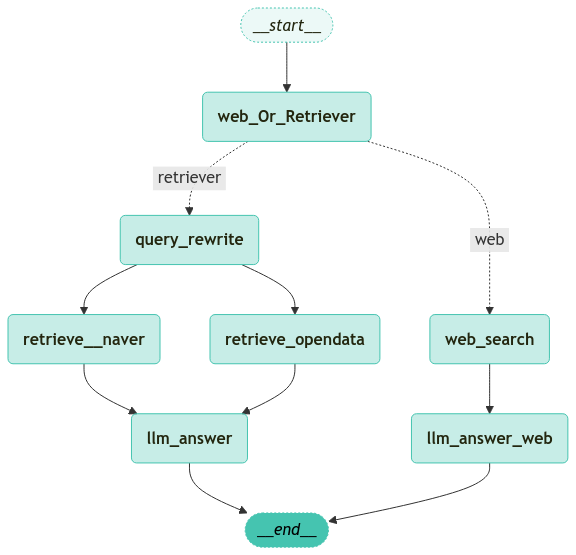

In [29]:
from langchain_teddynote.graphs import visualize_graph

visualize_graph(app)

In [30]:
from langchain_core.runnables import RunnableConfig
from langchain_teddynote.messages import invoke_graph, stream_graph, random_uuid

# config 설정(재귀 최대 횟수, thread_id)
config = RunnableConfig(recursion_limit=20, configurable={"thread_id": random_uuid()})

# 질문 입력
inputs = GraphState(question="용산구에 1박2일을 머물거야 일정을 검색해서 알려줘")

# 그래프 실행
invoke_graph(app, inputs, config)


🔄 Node: web_Or_Retriever 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
webOrRetriever:
web

🔄 Node: web_search 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
<document><title>서울 용산구 여행 정보: 꼭 가봐야할 곳 추천 리스트 & 여행 후기 | 익스피디아</title><url>https://www.expedia.co.kr/Seoul-Yongsan-Gu.dx179262</url><content>숙소 위치, 가볼 만한 곳, 놀거리 등 서울 용산구 여행을 최대한으로 즐기기 위해 필요한 모든 여행 정보를 지금 익스피디아에서 확인하세요!</content><raw>회원은 로그인 시 전 세계 10만여 개 호텔 10% 이상 할인
용산구
용산구 여행 정보
가볼 만한 인기 명소
서울에서 웬만한 곳이면 저 멀리서도 보이는 이 서울의 명소는 서울 시내를 한눈에 내려다볼 수 있는 전망을 자랑하지요.
남산공원을 방문해 넓게 펼쳐져 있는 이 산속 공원의 평화로운 자연 환경을 걸어서 탐방하고 케이블카를 타거나 서울의 멋진 스카이라인을 구경해 보세요.
수천 점의 유물과 우리 문화재 등을 소장하고 있는 국립중앙박물관에서 자연광이 들어오는 현대적인 전시실을 둘러보세요.
서울 여행 중 이태원 거리에 들러 쇼핑을 즐기며 스트레스를 날려보세요. 걷기 좋은 이곳에서 최고급 레스토랑에 들러 현지의 맛을 느껴보시는 걸 추천해 드려요. 
전쟁기념관에서 우리나라의 전쟁 역사에 대해 알아보고 방대한 군수 물품 전시를 감상하며 호국선열에 묵상하는 시간도 가져보세요.
서울 중앙성원에 방문하여 서울의 역사에 대해 배워보세요. 가족끼리 머물기 좋은 이곳에서 강변에 들러 한가로이 거닐어도 좋고 최고급 레스토랑에서 식도락 여행을 즐길 수도 있어요. 
용산구의 인기 호텔
후기 작성 날짜: 2025년 1월 2일
후기 작성 날짜: 2024년 12월 12일
후기 작